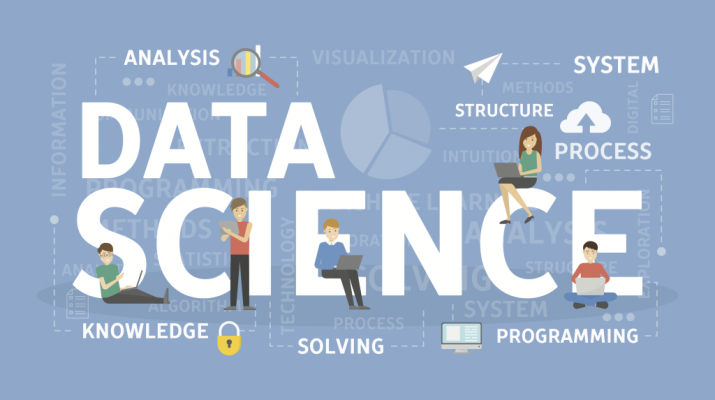

### From the past 5 years kaggle has been conducting the survey that presents the most comprehensional view of the data science and machine learning. So now let us explore the data given to understand the impact, priorities or concerns of a specific group of data science and machine learning practitioners.

# Importing Required Libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Lets start exploring the data

In [ ]:
df=pd.read_csv("/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv",skiprows=1,low_memory=False)


In [ ]:
import seaborn as sns
def plot_bar(col, title, palette):
    
    plt.figure(figsize=(10,10))
    plt.xticks(fontsize=16)
    sns.countplot(y=col,data=df.iloc[1:],order=df.iloc[1:][col].value_counts().index,palette=palette,linewidth=3,)
    plt.title(title)
    plt.show()

In [ ]:
df.head()

* So, we have nearly 42 questions related to Data Science. Let's deal with each question one after the other and educate ourselves how machine learning community performs machine learning tasks. 

### I will be mostly concentrating on India

### Lets explore distribution of Kagglers country wise

In [ ]:

df_country_count = pd.DataFrame({'Country':df[df.columns[3]].value_counts().index, 
                             'Count':df[df.columns[3]].value_counts().values})


data = [ dict(
        type = 'choropleth',
        locations = df_country_count['Country'],
        locationmode = 'country names',
        z = df_country_count['Count'],
        colorscale=
            [[0.0, "rgb(251, 237, 235)"],
            [0.09, "rgb(245, 211, 206)"],
            [0.12, "rgb(239, 179, 171)"],
            [0.15, "rgb(236, 148, 136)"],
            [0.22, "rgb(239, 117, 100)"],
            [0.35, "rgb(235, 90, 70)"],
            [0.45, "rgb(207, 81, 61)"],
            [0.65, "rgb(176, 70, 50)"],
            [0.85, "rgb(147, 59, 39)"],
            [1.00, "rgb(110, 47, 26)"]],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) 
        ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Participant'),
      ) ]

layout = dict(
    title = "Country Distribution of All Respondents",
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(type = 'Mercator'),
        width=500,height=400)
)

w_map = dict( data=data, layout=layout)
iplot( w_map, validate=False)


### Woohooo! Indians are crazy about kaggle now-a-days and this pandemic has helped many of the indians to come out of the regular studies and try out something that could make them feel knowledgable. And we can See most of the survey responders are Indians followed by USA

In [ ]:
country = "India"
if country not in df[df.columns[3]].unique():
  raise ValueError(f"{country} not found")
df["country"]=np.where(df[df.columns[3]]==country,country,'Others')

In [ ]:

fig=px.pie(df,df.columns[3],title=f"{len(df[df[df.columns[3]]==country])*100/len(df):.2f}% of all survey respondents are from {country}", hole=0.3)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Age Distribution

### Lets dive deep into the data to find out age group of kagglers who are more into kaggling

In [ ]:

fig=px.pie(df,df.columns[1],title="56% of all survey respondents are less than 30 yrs old", hole=0.6)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
age_pct = len(df[(df[df.columns[3]]==country) & (df[df.columns[1]].isin(['18-21','22-24','25-29']))])*100/len(df[df[df.columns[3]]==country])
if age_pct < 56:
    title = f"{country} is older, with {age_pct:.0f}% of Kagglers being under under 30"
elif age_pct > 56:
    title = f"{country} is younger, with {age_pct:.0f}% of Kagglers being under under 30"
else:
    title = f"{age_pct:.0f}% of Kagglers from {country} are also under 30"
fig = px.pie(df[df[df.columns[3]]==country], df.columns[1], title=title, hole=0.6)
fig.update_traces(textinfo='percent+label')

fig.show()
df['age1'] = df.iloc[:,1].str.split('-').str[0]
df['age1'].replace('70+','70', inplace=True)
df['age2'] = df.iloc[:,1].str.split('-').str[1]
df['age1'] = df.age1.astype('int')
df.age2.fillna(70, inplace=True)
df['age2'] = df.age2.astype('int')
df['age'] = (df.age1+df.age2)/2
global_median = df.age.mean()
country_median = df[df.country==country].age.mean()

if country_median <= global_median:
    title = f"With an average age of {country_median:.0f},<br>Kagglers from {country} are generally {global_median - country_median:.0f} years younger than the average Kaggler"
else:
    title = f"With an average age of {country_median:.0f},<br>Kagglers from {country} are generally {country_median - global_median:.0f} years younger than the average Kaggler"

loc = df.groupby(df.columns[3]).age.mean().sort_values(ascending=False).index.to_list().index(country)
color = ['#636EFA']*len(df.groupby(df.columns[3]).age.mean().sort_values(ascending=False).index)
color[loc] = 'orange'

fig = go.Figure(data=[go.Bar(x=df.groupby(df.columns[3]).age.mean().sort_values(ascending=False).index
       , y=df.groupby(df.columns[3]).age.mean().sort_values(ascending=False)
            , marker_color=color)])
fig.update_layout(
    shapes=[
    dict(
      type= 'line',
      yref= 'y', y0= global_median, y1= global_median,
      xref= 'x', x0= -0.5, x1= len(df.groupby(df.columns[3]).age)-0.5
    )],
    title=title,
    xaxis_title=None,
    yaxis_title='Age')

fig.add_annotation(x=len(df.groupby(df.columns[3]).age)*0.95, y=global_median, xshift=-20, yshift=10,
            text="Global Average",
            showarrow=False)
fig.show()
fig = go.Figure(data=[
    go.Bar(name=country, y=df[df.country==country][df.columns[1]].value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Others', y=df[df.country=='Others'][df.columns[1]].value_counts(normalize=True).sort_index()*100)
])

# Change the bar mode
fig.update_layout(
    barmode='group',
    title=f'Age distribution of Kagglers from {country} compared to others',
    xaxis_title='Age',
    yaxis_title='Percentage of respondents',
    xaxis = dict(
        tickmode = 'array',
        tickvals = [x for x in range(12)],
        ticktext = df[df.columns[1]].sort_values().unique()
    )
)

fig.show()


### Yayyy!  Students in india have started using kaggle like a hobby and we can see the diference how indians between age group (18-24) distanced out other countries. But the experienced ones are less in india as compared to other countries and Most of the Indians who responded to this survey are Youngsters.

# Gender Distribution

### Let's find out how the people of different genders are distributed 

In [ ]:
gender="Man"
fig=px.pie(df,df.columns[2],title="79.3% kagglers are men", hole=0.6)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
gnd_pct=len(df[(df[df.columns[3]]==country) & (df[df.columns[2]].isin(['Man']))])*100/len(df[df[df.columns[3]]==country])
df_all = df.groupby(df.columns[3])[df.columns[2]].value_counts().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))[:,gender].sort_values(ascending=False)
if country in df_all.index:
    country_avg = df_all[country]
    global_avg = len(df[df[df.columns[2]]==gender])*100/len(df)

    if country_avg > global_avg:
        title=f"In {country}, this percentage increases to {country_avg:.2f}%"
    else:
        title=f"In {country}, this percentage decreases to {country_avg:.2f}%"

    loc = df_all.index.to_list().index(country)
    color = ['#123AAA']*len(df_all.index)
    color[loc] = 'yellow'

    fig = go.Figure(data=[go.Bar(x=df_all.index, y=df_all.values, marker_color=color)])
    fig.update_layout(
        shapes=[
            dict(
              type= 'line',
              yref= 'y', y0= global_avg, y1= global_avg,
              xref= 'x', x0= -0.5, x1= len(df_all.index)-0.5
            )],
        title=title,
        xaxis_title="Country",
        yaxis_title='Percentage')
    fig.add_annotation(x=len(df_all.index)*0.95, y=global_avg, xshift=-20, yshift=10,
                text="Global Average",
                showarrow=False)
    fig.show()
    fig = go.Figure(data=[
    go.Bar(name=country, y=df[df.country==country][df.columns[2]].value_counts(normalize=True).sort_index()*100),
    go.Bar(name='Others', y=df[df.country=='Others'][df.columns[2]].value_counts(normalize=True).sort_index()*100)
])

# Change the bar mode
fig.update_layout(
    barmode='group',
    title=f'Gender distribution of Kagglers from {country} compared to others',
    xaxis_title='Gender',
    yaxis_title='Percentage of respondents',
    xaxis = dict(
        tickmode = 'array',
        tickvals = [x for x in range(12)],
        ticktext = df[df.columns[2]].sort_values().unique()
    )
)

fig.show()


> Woooo......! Percentage Distribution of men is way higher than women but Indian Women's Distribution is somewhat higher than the average of others, which is a good sign for India.

# Educational Qualification

In [ ]:
degree="Master’s degree"
df_academia=df[(df[df.columns[4]]!="I prefer not to answer") & (~df[df.columns[4]].isna())]
fig=px.pie(df_academia,df_academia.columns[4],title="Most of the kagglers are Holders of either Master's Degree or Bachelor's degree", hole=0.6)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
most_common_degree=df_academia[df_academia.iloc[:,3]==country].iloc[:,4].value_counts(normalize=True)[[0]]
if most_common_degree.index[0] == "Master's degree":
    title = f"The same trend is observed in {country},<br>with {most_common_degree[0]*100:.0f}% respondents reporting having a Master's degree"
else:
    title = f"In the case of {country},<br>more respondents reported having a {most_common_degree.index[0]} at {most_common_degree[0]*100:.0f}%"
    
fig=px.pie(df_academia[df_academia.iloc[:,3]==country],df_academia.columns[4],title=title, hole=0.6)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
df_academia = df.groupby(df.columns[3])[df.columns[4]].value_counts().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))[:,degree].sort_values(ascending=False)

### What shocked me from this donut chart is that 1% of the kagglers who responded have not gone past the high school. Don't you think that was too early to start????

# Job Titles

In [ ]:
df_job=df[(~df[df.columns[5]].isna())]
fig=px.pie(df_job,df_job.columns[5],title="26.2 % kagglers are student", hole=0.6)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
most_common_job=df_job[df_job.iloc[:,3]==country].iloc[:,5].value_counts(normalize=True)[[0]]
if most_common_job.index[0] == "Student":
    title = f"The same trend is observed in {country},<br>with {most_common_job[0]*100:.2f}% respondents reporting are students"
else:
    title = f"However, in the case of {country},<br>more respondents reported are {most_common_job.index[0]} at {most_common_job[0]*100:.2f}%"
    
fig=px.pie(df_job[df_job.iloc[:,3]==country],df_job.columns[5],title=title, hole=0.6)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
df_job = df.groupby(df.columns[3])[df.columns[4]].value_counts().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))[:,degree].sort_values(ascending=False)


### Kaggle respondents are mostly students and it is acceptable that the professionals might not be able to concnetrate on kaggle due to the workload they have.

# Coding Experience

In [ ]:
df_exp=df[(~df[df.columns[6]].isna())]
fig=px.pie(df,df.columns[6],title="Most of the kagglers are freshers who has an experience of below 3 years", hole=0.6)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
most_common_exp=df_exp[df_exp.iloc[:,3]==country].iloc[:,6].value_counts(normalize=True)[[0]]
if most_common_exp.index[0] == "1-3 years":
    title = f"The same trend is observed in {country},<br>with {most_common_exp[0]*100:.2f}% respondents reporting are freshers"
else:
    title = f"In the case of {country},<br>more respondents reported are {most_common_exp.index[0]} experienced employees at {most_common_job[0]*100:.2f}%"
    
fig=px.pie(df_exp[df_exp.iloc[:,3]==country],df_exp.columns[6],title=title, hole=0.6)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
plot_bar(df.columns[6], title="Years of experitse in writing code of kagglers", palette="Reds")


# Programming Languages

In [ ]:
programming_col= [col for col in df.columns if "What programming languages do you use on a regular basis?" in col]
df_pro=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in programming_col]
mapping_dict=dict(zip(programming_col,mapping))
df_pro=df_pro[programming_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)
df_pro.drop(columns=["None"],inplace=True)


In [ ]:
fig = px.bar(df_pro[df_pro.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=f'87% of all respondents use Python on a regular basis',
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()
most_common_lang=df_pro[df_pro.iloc[:,-1]==country][df_pro.columns[:-2]].count().sort_values(ascending=False)
if most_common_lang.index[0] == "Python":
    title = f"The same trend is observed in {country},<br>with {most_common_lang[0]} respondents reporting are {most_common_lang.index[0]} users"
else:
    title = f"In the case of {country},<br>more respondents reported are "

fig = px.bar(df_pro[df_pro.iloc[:,-1]==country][df_pro.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()

### From this Can we confirm that "Python is the most used programming language by the Kagglers" ? (Its the most used though)

# IDE used

In [ ]:
ide_col= [col for col in df.columns if "Which of the following integrated development environments (IDE's) do you use on a regular basis?" in col]
df_ide=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in ide_col]
mapping_dict=dict(zip(ide_col,mapping))
df_ide=df_ide[ide_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)
df_ide.drop(columns=["None"],inplace=True)
df_ide.head()

In [ ]:
fig = px.bar(df_ide[df_ide.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title="",
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()
most_common_ide=df_ide[df_ide.iloc[:,-1]==country][df_ide.columns[:-2]].count().sort_values(ascending=False)
if most_common_ide.index[0] == "Jupyter Notebook":
    title = f"The same trend is observed in {country},<br>with {most_common_ide[0]} respondents reporting are {most_common_ide.index[0]} users"
else:
    title = f"In the case of {country},<br>more respondents reported are {most_common_ide.index[0]} users at {most_common_ide[0]*100:.2f}%"

fig = px.bar(df_ide[df_ide.iloc[:,-1]==country][df_ide.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()

### Nothing surprising, Most of the budding machine learning enthusiasts are fond of using jupyter notebook as using it is pretty much easier than anything else

# Hosting Notebook Products

In [ ]:
host_col= [col for col in df.columns if "Which of the following hosted notebook products do you use on a regular basis?" in col]
df_host=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in host_col]
mapping_dict=dict(zip(host_col,mapping))
df_host=df_host[host_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)
df_host.drop(columns=["None"],inplace=True)
df_host.head()

fig = px.bar(df_host[df_host.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title="Hosted Notebook products used on daily basis",
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()
most_common_host=df_host[df_host.iloc[:,-1]==country][df_host.columns[:-2]].count().sort_values(ascending=False)
if most_common_host.index[0] == "Colab Notebooks":
    title = f"The same trend is observed in {country}, with {most_common_host[0]} respondents reporting are using {most_common_host.index[0]} as hosted notebook followed by {most_common_host.index[1]}"
else:
    title = f"In the case of {country},<br>more respondents reported are {most_common_host.index[0]} users at {most_common_ide[0]*100:.2f}%"

fig = px.bar(df_host[df_host.iloc[:,-1]==country][df_host.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()

### Hands Up!! I myself using Colab notebooks and kaggle notebooks from the past 1 year. This isn't a Surprise for me

# Computational Platform used

In [ ]:
device_col= [col for col in df.columns if "What type of computing platform do you use most often for your data science projects?" in col]
df_device=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in device_col]
mapping_dict=dict(zip(device_col,mapping))
df_device=df_device[device_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)

In [ ]:
fig = px.bar(df_device["Selected Choice"].value_counts())
fig.update_layout(
    title="Computational Devices used for data science projects",
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside',)
fig.show()


# Specialized Hardware usage

In [ ]:
hardware_col= [col for col in df.columns if "Which types of specialized hardware do you use on a regular basis?" in col]
df_hardware=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in hardware_col]
mapping_dict=dict(zip(hardware_col,mapping))
df_hardware=df_hardware[hardware_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)
df_hardware.drop(columns=["None"],inplace=True)


In [ ]:
fig = px.bar(df_hardware[df_hardware.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title="Specialized hardware used on daily basis",
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()
most_common_hardware=df_hardware[df_hardware.iloc[:,-1]==country][df_hardware.columns[:-2]].count().sort_values(ascending=False)
if most_common_hardware.index[0] == "NVIDIA GPUs ":
    title = f"The same trend is observed in {country}, with {most_common_hardware[0]} respondents reporting are using {most_common_hardware.index[0]} as Specialized hardware followed by {most_common_hardware.index[1]}"
else:
    title = f"In the case of {country},<br>more respondents reported are {most_common_hardware.index[0]} users at {most_common_hardware[0]}"

fig = px.bar(df_hardware[df_hardware.iloc[:,-1]==country][df_hardware.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()

### "NVIDIA GPUs" are the most used hardwares 

# TPU usage

In [ ]:
tpu_col= [col for col in df.columns if "Approximately how many times have you used a TPU (tensor processing unit)?" in col]
df_tpu=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in tpu_col]
mapping_dict=dict(zip(tpu_col,mapping))
df_tpu=df_tpu[tpu_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)


In [ ]:
fig = px.bar(df_tpu["Approximately how many times have you used a TPU (tensor processing unit)?"].value_counts())
fig.update_layout(
    title="TPU usage science projects",
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside',)
fig.show()

### May be I also belong to the  category of majority of the kagglers in this particular phase as I have never used a TPU yet. But looking forward to use them when required.

# Data Visualization tools usage

In [ ]:
viz_col= [col for col in df.columns if "What data visualization libraries or tools do you use on a regular basis? " in col]
df_viz=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in viz_col]
mapping_dict=dict(zip(viz_col,mapping))
df_viz=df_viz[viz_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)
df_viz.drop(columns=["None"],inplace=True)


In [ ]:
fig = px.bar(df_viz[df_viz.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title="Data Visualization tools used on daily basis",
    xaxis_title="Data Visualization tools used",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()
print("="*199)
most_common_viz=df_viz[df_viz.iloc[:,-1]==country][df_viz.columns[:-2]].count().sort_values(ascending=False)
if most_common_viz.index[0] == "Matplotlib ":
    title = f"The same trend is observed in {country}, with {most_common_viz[0]} respondents reporting are using {most_common_viz.index[0]} as data visualisation tool followed by {most_common_viz.index[1]}"
else:
    title = f"In the case of {country},<br>more respondents reported are {most_common_viz.index[0]} users at {most_common_viz[0]}"

fig = px.bar(df_viz[df_viz.iloc[:,-1]==country][df_viz.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title="Data Visualization tools used",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()

### Matplotlib is the mostly used but I use Plotly to make the visualizations more Interactive

# Experience in using machine learning models

In [ ]:
ml_col= [col for col in df.columns if "For how many years have you used machine learning methods?" in col]
df_ml=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in ml_col]
mapping_dict=dict(zip(ml_col,mapping))
df_ml=df_ml[ml_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)


In [ ]:
fig = px.bar(df_ml["For how many years have you used machine learning methods?"].value_counts())
fig.update_layout(
    title="years of experience using machine learning methods?",
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside',)
fig.show()

# Machine learning Frameworks usage

In [ ]:
ml_fw_col= [col for col in df.columns if "Which of the following machine learning frameworks do you use on a regular basis?" in col]
df_ml_fw=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in ml_fw_col]
mapping_dict=dict(zip(ml_fw_col,mapping))
df_ml_fw=df_ml_fw[ml_fw_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)
df_ml_fw.drop(columns=["None"],inplace = True)

In [ ]:
fig = px.bar(df_ml_fw[df_ml_fw.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=" Machine learning framework used on daily basis",
    xaxis_title="Machine learning framework used",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()
print("="*199)
most_common_ml_fw=df_ml_fw[df_ml_fw.iloc[:,-1]==country][df_ml_fw.columns[:-2]].count().sort_values(ascending=False)
if most_common_ml_fw.index[0] == 'learn ':
    title = f"The same trend is observed in {country}, with {most_common_ml_fw[0]} respondents reporting are using {most_common_ml_fw.index[0]} as ML framework followed by {most_common_ml_fw.index[1]}"
else:
    title = f"In the case of {country},<br>more respondents reported are {most_common_ml_fw.index[0]} users at {most_common_ml_fw[0]}"

fig = px.bar(df_ml_fw[df_ml_fw.iloc[:,-1]==country][df_ml_fw.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title="Machine learning framework used",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()

# Machine Learning Algorithms

In [ ]:
ml_algo_col= [col for col in df.columns if "Which of the following ML algorithms do you use on a regular basis?" in col]
df_ml_algo=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in ml_algo_col]
mapping_dict=dict(zip(ml_algo_col,mapping))
df_ml_algo=df_ml_algo[ml_algo_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)
df_ml_algo.drop(columns=["None"],inplace = True)

In [ ]:
fig = px.bar(df_ml_algo[df_ml_algo.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=" Machine learning Algorithms used on daily basis",
    xaxis_title="Machine learning Algorithms used",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()
print("="*199)
most_common_ml_algo=df_ml_algo[df_ml_algo.iloc[:,-1]==country][df_ml_algo.columns[:-2]].count().sort_values(ascending=False)
if most_common_ml_algo.index[0] == 'Linear or Logistic Regression':
    title = f"The same trend is observed in {country}, with {most_common_ml_algo[0]} respondents reporting are using {most_common_ml_algo.index[0]} as Machine learning models followed by {most_common_ml_algo.index[1]}"
else:
    title = f"In the case of {country},<br>more respondents reported are {most_common_ml_algo.index[0]} users at {most_common_ml_algo[0]}"

fig = px.bar(df_ml_algo[df_ml_algo.iloc[:,-1]==country][df_ml_algo.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title="Machine learning Algorithms used",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()

# Computer Vision Methods

In [ ]:
cv_col= [col for col in df.columns if "Which categories of computer vision methods do you use on a regular basis?" in col]
df_cv=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in cv_col]
mapping_dict=dict(zip(cv_col,mapping))
df_cv=df_cv[cv_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)
df_cv.drop(columns=["None"],inplace = True)


In [ ]:
fig = px.bar(df_cv[df_cv.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=" Computer Vision methods used on daily basis",
    xaxis_title="Computer Vision methods used",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()
print("="*199)
most_common_cv=df_cv[df_cv.iloc[:,-1]==country][df_cv.columns[:-2]].count().sort_values(ascending=False)
if most_common_cv.index[0] == 'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)':
    title = f"The same trend is observed in {country}, with {most_common_cv[0]} respondents reporting are using {most_common_cv.index[0]} as Computer Vision methods followed by {most_common_cv.index[1]}"
else:
    title = f"In the case of {country},<br>more respondents reported are {most_common_cv.index[0]} users at {most_common_cv[0]}"

fig = px.bar(df_cv[df_cv.iloc[:,-1]==country][df_cv.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title="Computer Vision methods used",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()

# Natural language processing methods

In [ ]:
nlp_col= [col for col in df.columns if "Which of the following natural language processing (NLP) methods do you use on a regular basis?" in col]
df_nlp=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in nlp_col]
mapping_dict=dict(zip(nlp_col,mapping))
df_nlp=df_nlp[nlp_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)
df_nlp.drop(columns=["None"],inplace = True)


In [ ]:
fig = px.bar(df_nlp[df_nlp.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=" NLP methods used on daily basis",
    xaxis_title="NLP methods used",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()
print("="*199)
most_common_nlp=df_nlp[df_nlp.iloc[:,-1]==country][df_nlp.columns[:-2]].count().sort_values(ascending=False)
if most_common_nlp.index[0] == 'Word embeddings/vectors (GLoVe, fastText, word2vec)':
    title = f"The same trend is observed in {country}, with {most_common_nlp[0]} respondents reporting are using {most_common_nlp.index[0]} as NLP methods followed by {most_common_nlp.index[1]}"
else:
    title = f"In the case of {country},<br>more respondents reported are {most_common_nlp.index[0]} users at {most_common_nlp[0]}"

fig = px.bar(df_nlp[df_nlp.iloc[:,-1]==country][df_nlp.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title="NLP methods used",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()

# Current employer industry

In [ ]:
industry_col= [col for col in df.columns if "In what industry is your current employer/contract (or your most recent employer if retired)?" in col]
df_industry=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in industry_col]
mapping_dict=dict(zip(industry_col,mapping))
df_industry=df_industry[industry_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)


In [ ]:
fig = px.bar(df_industry["Selected Choice"].value_counts())
fig.update_layout(
    title="current employer/contract industry",
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside',)
fig.show()

# Size of the Company

In [ ]:
size_col= [col for col in df.columns if "What is the size of the company where you are employed?" in col]
df_size=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in size_col]
mapping_dict=dict(zip(size_col,mapping))
df_size=df_size[size_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)


In [ ]:
fig = px.bar(df_size["What is the size of the company where you are employed?"].value_counts())
fig.update_layout(
    title="Size of the company",
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside',)
fig.show()

# Workload Management in the Industry

In [ ]:
ds_workload_col= [col for col in df.columns if "Approximately how many individuals are responsible for data science workloads at your place of business?" in col]
df_ds_workload=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in ds_workload_col]
mapping_dict=dict(zip(ds_workload_col,mapping))
df_ds_workload=df_ds_workload[ds_workload_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)

In [ ]:
fig = px.bar(df_ds_workload["Approximately how many individuals are responsible for data science workloads at your place of business?"].value_counts())
fig.update_layout(
    title="Responsible Data Science workload Individuals",
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside',)
fig.show()

# How far the companies have reached in implementing Machine Learning into their business?

In [ ]:
ml_app_col= [col for col in df.columns if "Does your current employer incorporate machine learning methods into their business?" in col]
df_ml_app=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in ml_app_col]
mapping_dict=dict(zip(ml_app_col,mapping))
df_ml_app=df_ml_app[ ml_app_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)

In [ ]:
fig = px.bar(df_ml_app["Does your current employer incorporate machine learning methods into their business?"].value_counts())
fig.update_layout(
    title="Machine learning incorporation into business",
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside',)
fig.show()

# What is the Important task of using Machine Learning in the Industry??

In [ ]:
role_col= [col for col in df.columns if "Select any activities that make up an important part of your role at work:" in col]
df_role=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in role_col]
mapping_dict=dict(zip(role_col,mapping))
df_role=df_role[ role_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)

In [ ]:
fig = px.bar(df_role[df_role.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=" Role at work",
    xaxis_title="Role at work",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()
print("="*199)
most_common_role=df_role[df_role.iloc[:,-1]==country][df_role.columns[:-2]].count().sort_values(ascending=False)
if most_common_role.index[0] == 'Analyze and understand data to influence product or business decisions':
    title = f"The same trend is observed in {country}, with {most_common_role[0]} respondents reporting are of {most_common_role.index[0]} role followed by {most_common_role.index[1]}"
else:
    title = f"In the case of {country},<br>more respondents reported are {most_common_role.index[0]} users at {most_common_role[0]}"

fig = px.bar(df_role[df_role.iloc[:,-1]==country][df_role.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title="Role at work",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()

# Salary Breakdown

In [ ]:
salary_col= [col for col in df.columns if "What is your current yearly compensation (approximate $USD)?" in col]
df_salary=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in salary_col]
mapping_dict=dict(zip(salary_col,mapping))
df_salary=df_salary[ salary_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)



In [ ]:
fig = px.bar(df_salary["What is your current yearly compensation (approximate $USD)?"].value_counts())
fig.update_layout(
    title="Current yearly compensation",
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside',)
fig.show()

# Cloud Computing Platforms Used

In [ ]:
cloud_comp_col= [col for col in df.columns if "Which of the following cloud computing platforms do you use on a regular basis?" in col]
df_cloud_comp=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in cloud_comp_col]
mapping_dict=dict(zip(cloud_comp_col,mapping))
df_cloud_comp=df_cloud_comp[ cloud_comp_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)



In [ ]:
fig = px.bar(df_cloud_comp[df_cloud_comp.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title="Cloud Computing platforms",
    xaxis_title="cloud computing platforms",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()
print("="*199)
most_common_cloud_comp=df_cloud_comp[df_cloud_comp.iloc[:,-1]==country][df_cloud_comp.columns[:-2]].count().sort_values(ascending=False)
if most_common_cloud_comp.index[0] == 'Amazon Web Services (AWS) ':
    title = f"The same trend is observed in {country}, with {most_common_cloud_comp[0]} respondents reporting are using {most_common_cloud_comp.index[0]} as Cloud Computing platforms followed by {most_common_cloud_comp.index[1]}"
else:
    title = f"In the case of {country},<br>more respondents reported are {most_common_cloud_comp.index[0]} users at {most_common_cloud_comp[0]}"

fig = px.bar(df_cloud_comp[df_cloud_comp.iloc[:,-1]==country][df_cloud_comp.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title="Cloud Computing platforms",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()

# Most used Cloud Computing Platforms

In [ ]:
fav_cloud_col= [col for col in df.columns if "Of the cloud platforms that you are familiar with, which has the best developer experience (most enjoyable to use)?" in col]
df_fav_cloud=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in fav_cloud_col]
mapping_dict=dict(zip(fav_cloud_col,mapping))
df_fav_cloud=df_fav_cloud[ fav_cloud_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)

In [ ]:
fig = px.bar(df_fav_cloud["Selected Choice"].value_counts())
fig.update_layout(
    title="Familiar Cloud Platforms",
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()

In [ ]:
cloud_comp_prod_col= [col for col in df.columns if "Which of the following cloud computing platforms do you use on a regular basis?" in col]
df_cloud_comp_prod=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in cloud_comp_prod_col]
mapping_dict=dict(zip(cloud_comp_prod_col,mapping))
df_cloud_comp_prod=df_cloud_comp_prod[ cloud_comp_prod_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)

In [ ]:
fig = px.bar(df_cloud_comp_prod[df_cloud_comp_prod.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title="Cloud Computing products",
    xaxis_title="cloud computing products",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()
print("="*199)
most_common_cloud_comp_prod=df_cloud_comp_prod[df_cloud_comp_prod.iloc[:,-1]==country][df_cloud_comp_prod.columns[:-2]].count().sort_values(ascending=False)
if most_common_cloud_comp_prod.index[0] == 'Amazon Web Services (AWS) ':
    title = f"The same trend is observed in {country}, with {most_common_cloud_comp_prod[0]} respondents reporting are using {most_common_cloud_comp_prod.index[0]} as Cloud Computing products followed by {most_common_cloud_comp_prod.index[1]}"
else:
    title = f"In the case of {country},<br>more respondents reported are {most_common_cloud_comp_prod.index[0]} users at {most_common_cloud_comp_prod[0]}"

fig = px.bar(df_cloud_comp_prod[df_cloud_comp_prod.iloc[:,-1]==country][df_cloud_comp_prod.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title="Cloud Computing products",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()

# Data Storage Products

In [ ]:
data_storage_prod_col= [col for col in df.columns if "Do you use any of the following data storage products on a regular basis?" in col]
df_data_storage_prod=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in data_storage_prod_col]
mapping_dict=dict(zip(data_storage_prod_col,mapping))
df_data_storage_prod=df_data_storage_prod[ data_storage_prod_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)

In [ ]:
fig = px.bar(df_data_storage_prod[df_data_storage_prod.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title="Data Storage products",
    xaxis_title="Data Storage products",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()
print("="*199)
most_common_data_storage_prod=df_data_storage_prod[df_data_storage_prod.iloc[:,-1]==country][df_data_storage_prod.columns[:-2]].count().sort_values(ascending=False)
if most_common_data_storage_prod.index[0] == 'Amazon Simple Storage Service (S3)  ':
    title = f"The same trend is observed in {country}, with {most_common_data_storage_prod[0]} respondents reporting are using {most_common_data_storage_prod.index[0]} as Data Storage products followed by {most_common_data_storage_prod.index[1]}"
else:
    title = f"In the case of {country},<br>more respondents reported are {most_common_data_storage_prod.index[0]} users at {most_common_data_storage_prod[0]}"

fig = px.bar(df_data_storage_prod[df_data_storage_prod.iloc[:,-1]==country][df_data_storage_prod.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title="Data Storage products",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()

# Managed Machine Learing Products used on regular basis

In [ ]:
ml_prod_col= [col for col in df.columns if "Do you use any of the following managed machine learning products on a regular basis?" in col]
df_ml_prod=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in ml_prod_col]
mapping_dict=dict(zip(ml_prod_col,mapping))
df_ml_prod=df_ml_prod[ ml_prod_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)
df_ml_prod.drop(columns=["No / None"],inplace=True)

In [ ]:
fig = px.bar(df_ml_prod[df_ml_prod.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title="Managed ML products",
    xaxis_title="Managed ML products",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()
print("="*199)
most_common_ml_prod=df_ml_prod[df_ml_prod.iloc[:,-1]==country][df_ml_prod.columns[:-2]].count().sort_values(ascending=False)
if most_common_ml_prod.index[0] == 'Amazon SageMaker ':
    title = f"The same trend is observed in {country}, with {most_common_ml_prod[0]} respondents reporting are using {most_common_ml_prod.index[0]} as Managed ML product followed by {most_common_ml_prod.index[1]}"
else:
    title = f"In the case of {country},<br>more respondents reported are {most_common_ml_prod.index[0]} users at {most_common_ml_prod[0]}"

fig = px.bar(df_ml_prod[df_ml_prod.iloc[:,-1]==country][df_ml_prod.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title="Managed ML products",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()

# Big Data Products

In [ ]:
big_data_col= [col for col in df.columns if "Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis?" in col]
df_big_data=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in big_data_col]
mapping_dict=dict(zip(big_data_col,mapping))
df_big_data=df_big_data[ big_data_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)

In [ ]:
fig = px.bar(df_big_data[df_big_data.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title="big_data products",
    xaxis_title="big_data products",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()
print("="*199)
most_common_big_data=df_big_data[df_big_data.iloc[:,-1]==country][df_big_data.columns[:-2]].count().sort_values(ascending=False)
if most_common_big_data.index[0] == 'MySQL ':
    title = f"The same trend is observed in {country}, with {most_common_big_data[0]} respondents reporting are using {most_common_big_data.index[0]} as BIG DATA product followed by {most_common_big_data.index[1]}"
else:
    title = f"In the case of {country},<br>more respondents reported are {most_common_big_data.index[0]} users at {most_common_big_data[0]}"

fig = px.bar(df_big_data[df_big_data.iloc[:,-1]==country][df_big_data.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title="big_data products",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()

In [ ]:
big_data_prod_col= [col for col in df.columns if "Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often?" in col]
df_big_data_prod=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in big_data_prod_col]
mapping_dict=dict(zip(big_data_prod_col,mapping))
df_big_data_prod=df_big_data_prod[ big_data_prod_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)


In [ ]:
fig = px.bar(df_big_data_prod["Selected Choice"].value_counts())
fig.update_layout(
    title="Big Data Products",
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside',)
fig.show()

# BI tools used

In [ ]:
bi_tools_col= [col for col in df.columns if "Which of the following business intelligence tools do you use on a regular basis? (Select all that apply)" in col]
df_bi_tools=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in bi_tools_col]
mapping_dict=dict(zip(bi_tools_col,mapping))
df_bi_tools=df_bi_tools[ bi_tools_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)

In [ ]:
fig = px.bar(df_bi_tools[df_bi_tools.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title="BI tools",
    xaxis_title="BI tools",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()
print("="*199)
most_common_bi_tools=df_bi_tools[df_bi_tools.iloc[:,-1]==country][df_bi_tools.columns[:-2]].count().sort_values(ascending=False)
if most_common_bi_tools.index[0] == 'MySQL ':
    title = f"The same trend is observed in {country}, with {most_common_bi_tools[0]} respondents reporting are using {most_common_bi_tools.index[0]} as bi tools followed by {most_common_bi_tools.index[1]}"
else:
    title = f"In the case of {country},<br>more respondents reported are {most_common_bi_tools.index[0]} users at {most_common_bi_tools[0]}"

fig = px.bar(df_bi_tools[df_bi_tools.iloc[:,-1]==country][df_bi_tools.columns[:-2]].count().sort_values(ascending=False))
fig.update_layout(
    title=title,
    xaxis_title="bi_tools",
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()

# Mostly used BI tools

In [ ]:
bi_tools_often_col= [col for col in df.columns if "Which of the following business intelligence tools do you use most often?" in col]
df_bi_tools_often=df.copy()
mapping=[col.split('-')[-1].lstrip() for col in bi_tools_often_col]
mapping_dict=dict(zip(bi_tools_often_col,mapping))
df_bi_tools_often=df_bi_tools_often[ bi_tools_often_col + [df.columns[3]] + ["country"]].rename(columns=mapping_dict)

In [ ]:
fig = px.bar(df_bi_tools_often["Selected Choice"].value_counts())
fig.update_layout(
    title="BI tools used often",
    xaxis_title=None,
    yaxis_title='Number of respondents',
    showlegend=False
)
fig.update_traces(textposition='inside')
fig.show()